**Пропуски и дубликаты**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('tripadvisor_yelp_opentable_data.csv')

В некоторых столбцах -1 вместо None. Исправим для удобных преобразований с дубликатами (потом вернем)

In [ ]:
data['reviews_rating_1'] = data['reviews_rating_1'].where(data['reviews_rating_1'] >= 0, None)
data['reviews_rating_2'] = data['reviews_rating_2'].where(data['reviews_rating_2'] >= 0, None)
data['reviews_rating_3'] = data['reviews_rating_3'].where(data['reviews_rating_3'] >= 0, None)
data['reviews_rating_4'] = data['reviews_rating_4'].where(data['reviews_rating_4'] >= 0, None)
data['reviews_rating_5'] = data['reviews_rating_5'].where(data['reviews_rating_5'] >= 0, None)

Найдем дубликаты

In [ ]:
data=data.drop_duplicates()

In [ ]:
data_duplicated = data['name'].duplicated()
duplicates_name_indexes=list(data_duplicated[data_duplicated==True].reset_index()['index'])

In [ ]:
duplicates_name = list(data.loc[data.index.isin(duplicates_name_indexes)==True]['name']) #лист с названиями ресторанов у которых есть дубликаты

In [ ]:
data_duplicates=data[data['name'].isin(duplicates_name)==True].sort_values(by='name').reset_index()
data_duplicates.head()

,index,id,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5
0,3869,911355,ASK Italian,1158.0,4.0,$$ - $$$,False,51.494873,-0.183515,True,False,"Italian, Pizza, Mediterranean, European","Vegetarian friendly, Vegan options, Gluten fre...","Delivery, Takeout, Reservations, Seating, High...",68.0,77.0,197.0,442.0,374.0
1,1368,1013490,ASK Italian,1254.0,4.0,$$ - $$$,False,51.514492,-0.175107,True,False,"Italian, Pizza","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Outdoor Seating, Seatin...",55.0,63.0,144.0,401.0,593.0
2,4712,10317282,ASK Italian,386.0,4.0,$$ - $$$,False,51.503365,0.004855,True,False,"Italian, Pizza","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Seating, Highchairs Ava...",43.0,31.0,42.0,83.0,187.0
3,533,6425807,Afternoon Tea,604.0,3.5,$$$$,False,51.512740,-0.118806,False,False,British,"Vegetarian friendly, Gluten free options","Reservations, Private Dining, Seating, Highcha...",66.0,91.0,90.0,117.0,240.0
4,3303,5121709,Afternoon Tea,121.0,4.5,$$$$,False,51.502563,-0.153783,False,False,"European, British","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Seating, Wheelchair Accessible, ...",0.0,6.0,4.0,18.0,93.0


Заполним в исходной таблице строки с недостающими значениями с помощью добавления информации из дубликатов по name.

In [ ]:
# Группировка индексов по name
for name, group in data_duplicates.groupby('name'):
    indexes = group['index'].tolist()

    # Извлекаем строки-дубликаты
    duplicates = data.loc[indexes]

    # Фильтруем строки с непустым latitude
    non_empty_latitude = duplicates[duplicates['latitude'].notnull()]

    # Проверяем, есть ли такие строки
    if not non_empty_latitude.empty:
        # Выбираем первую строку с непустым latitude
        filled_row = non_empty_latitude.iloc[0]

        # Заполняем пустые значения в каждой строке-дубликате
        for idx in indexes:
            data.loc[idx] = data.loc[idx].combine_first(filled_row)

data.sort_values(by='name')

,id,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5
1132,11689384,'O ver,515.0,4.5,$$ - $$$,False,51.504765,-0.093871,True,False,"Italian, Neapolitan","Vegetarian friendly, Vegan options, Gluten fre...","Delivery, Takeout, Reservations, Seating, Whee...",19.0,17.0,49.0,108.0,322.0
6659,23379654,081 Pizzeria London,25.0,4.5,NaN,False,51.470905,-0.069088,False,False,"Italian, Pizza, Neapolitan, Campania, Southern...",NaN,"Delivery, Takeout, Reservations, Outdoor Seati...",2.0,1.0,0.0,0.0,22.0
891,697997,1 Lombard Street,616.0,4.0,$$$$,False,51.512780,-0.088908,False,False,French,"Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Private Dining, Seating, Serves ...",27.0,56.0,109.0,221.0,204.0
1245,2587004,10 Greek Street,594.0,4.5,$$ - $$$,False,51.514473,-0.131098,False,False,European,"Vegetarian friendly, Vegan options, Gluten fre...","Seating, Serves Alcohol, Full Bar, Accepts Cre...",11.0,11.0,39.0,185.0,348.0
722,9582978,100 Wardour St Bar & Lounge,2723.0,4.5,$$ - $$$,False,51.513520,-0.133938,False,False,"International, European","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Private Dining, Seating, Serves ...",205.0,110.0,140.0,284.0,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,2550648,wagamama north greenwich o2,706.0,4.0,$$ - $$$,False,51.500750,0.005635,True,False,"Japanese, Asian, Soups","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Seating, Highchairs Ava...",42.0,49.0,97.0,285.0,233.0
4825,13962474,yamas Greek Cuisine,93.0,4.5,$$ - $$$,False,51.535713,-0.139406,False,False,"Mediterranean, Greek","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Seating, Serves Alcohol...",0.0,4.0,12.0,12.0,65.0
2158,12922934,Ô Gourmet Libanais,151.0,5.0,$$ - $$$,False,51.463364,-0.184632,True,False,"Lebanese, Mediterranean, Middle Eastern","Vegetarian friendly, Vegan options, Halal, Glu...","Delivery, Takeout, Reservations, Outdoor Seati...",1.0,0.0,2.0,8.0,140.0
547,2297973,​Byward Kitchen and Bar,800.0,4.5,$$ - $$$,False,51.509290,-0.079005,False,True,"Grill, Dining bars","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Outdoor Seating, Privat...",29.0,25.0,81.0,200.0,466.0


Посмотрим что поменялось для таблицы дубликатов

In [ ]:
data_duplicates=data[data['name'].isin(duplicates_name)==True].sort_values(by='name').reset_index()
data_duplicates.head(5)

,index,id,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5
0,3869,911355,ASK Italian,1158.0,4.0,$$ - $$$,False,51.494873,-0.183515,True,False,"Italian, Pizza, Mediterranean, European","Vegetarian friendly, Vegan options, Gluten fre...","Delivery, Takeout, Reservations, Seating, High...",68.0,77.0,197.0,442.0,374.0
1,1368,1013490,ASK Italian,1254.0,4.0,$$ - $$$,False,51.514492,-0.175107,True,False,"Italian, Pizza","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Outdoor Seating, Seatin...",55.0,63.0,144.0,401.0,593.0
2,4712,10317282,ASK Italian,386.0,4.0,$$ - $$$,False,51.503365,0.004855,True,False,"Italian, Pizza","Vegetarian friendly, Vegan options, Gluten fre...","Takeout, Reservations, Seating, Highchairs Ava...",43.0,31.0,42.0,83.0,187.0
3,533,6425807,Afternoon Tea,604.0,3.5,$$$$,False,51.512740,-0.118806,False,False,British,"Vegetarian friendly, Gluten free options","Reservations, Private Dining, Seating, Highcha...",66.0,91.0,90.0,117.0,240.0
4,3303,5121709,Afternoon Tea,121.0,4.5,$$$$,False,51.502563,-0.153783,False,False,"European, British","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Seating, Wheelchair Accessible, ...",0.0,6.0,4.0,18.0,93.0


Теперь строки заполнены по максимуму. но от дубликатов по прежнему не избавились

In [ ]:
data.head()

,id,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5
0,2418348,Leicester Arms,602.0,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,"British, Pub","Vegetarian friendly, Gluten free options","Reservations, Seating, Street Parking, Televis...",30.0,23.0,51.0,156.0,342.0
1,26452946,Swiss Butter,182.0,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,"French, Steakhouse",NaN,"Seating, Wheelchair Accessible, Serves Alcohol...",21.0,15.0,14.0,22.0,110.0
2,25151198,Florattica Rooftop Bar London,316.0,4.5,$$ - $$$,False,51.512955,-0.075292,False,True,"Bar, European, British, Healthy, Dining bars",NaN,"Reservations, Outdoor Seating, Seating, Serves...",15.0,4.0,7.0,11.0,279.0
3,2213156,The Black Dog Freehouse,733.0,4.5,$$ - $$$,False,51.488724,-0.120889,False,False,"Bar, British, Pub","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Outdoor Seating, Seating, Highch...",19.0,23.0,47.0,216.0,428.0
4,27930238,Fitz's Brasserie,48.0,5.0,$$ - $$$,False,51.522408,-0.124933,False,False,"Steakhouse, British, Contemporary",Vegetarian friendly,"Reservations, Seating, Wheelchair Accessible, ...",0.0,1.0,1.0,2.0,44.0


Nan в diets это не пропущенное значение, а признак "меню не является диетическим" по смыслу. Добавим

In [ ]:
data['diets']=data['diets'].fillna('The menu does not match the diets')

Аналогично для is_sponsored :
это рестораны, которые рекомендует tripadvisor. Строки в которых этот пункт Nan, соответственно 0.

In [ ]:
data['is_sponsored']=data['is_sponsored'].fillna('False')

Остальные Nan - отсутствие информации. Удалим строки с ними.

In [ ]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6742 entries, 0 to 7124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6742 non-null   int64  
 1   name              6742 non-null   object 
 2   reviews           6742 non-null   float64
 3   rating            6742 non-null   float64
 4   price_range       6742 non-null   object 
 5   is_sponsored      6742 non-null   object 
 6   latitude          6742 non-null   float64
 7   longitude         6742 non-null   float64
 8   has_delivery      6742 non-null   object 
 9   is_premium        6742 non-null   object 
 10  cuisines          6742 non-null   object 
 11  diets             6742 non-null   object 
 12  dining_options    6742 non-null   object 
 13  reviews_rating_1  6742 non-null   float64
 14  reviews_rating_2  6742 non-null   float64
 15  reviews_rating_3  6742 non-null   float64
 16  reviews_rating_4  6742 non-null   float64
 17  

Вернемся к дубликатам. Теперь остались почти одинаковые строки т к NaN убрали. Удалим случайным образом дубликаты по id

In [ ]:
data = data.drop_duplicates(subset='id')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6742 entries, 0 to 7124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6742 non-null   int64  
 1   name              6742 non-null   object 
 2   reviews           6742 non-null   float64
 3   rating            6742 non-null   float64
 4   price_range       6742 non-null   object 
 5   is_sponsored      6742 non-null   object 
 6   latitude          6742 non-null   float64
 7   longitude         6742 non-null   float64
 8   has_delivery      6742 non-null   object 
 9   is_premium        6742 non-null   object 
 10  cuisines          6742 non-null   object 
 11  diets             6742 non-null   object 
 12  dining_options    6742 non-null   object 
 13  reviews_rating_1  6742 non-null   float64
 14  reviews_rating_2  6742 non-null   float64
 15  reviews_rating_3  6742 non-null   float64
 16  reviews_rating_4  6742 non-null   float64
 17  

Получили датасет без дубликатов и пропусков размером около 83% от исходного

Теперь добавим бинарный признак, упоминается ли ресторан в MICHELIN Guide

In [ ]:
data_michelin=pd.read_csv('restaurants_Michelin.csv')

In [ ]:
data_michelin.loc[333]='Chishuru' #один из ресторанов записался вместо названия колонки

In [ ]:
data_michelin = data_michelin.rename(columns={'Chishuru': 'name'})

In [ ]:
data_michelin['IsIn_MICHELIN_Guide']=1

In [ ]:
data_michelin

,name,IsIn_MICHELIN_Guide
0,El Pastor,1
1,Bancone,1
2,Paradise,1
3,Cabotte,1
4,Alain Ducasse at The Dorchester,1
...,...,...
329,Pophams,1
330,Takahashi,1
331,Plates London,1
332,La Trompette,1


Объединим с исходной таблицей

In [ ]:
data_result=pd.merge(left=data, right=data_michelin, on=['name'], how='left')
data_result=data_result.fillna(0)
data_result

<ipython-input-26-279bbf9d8599>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_result=data_result.fillna(0)


,id,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide
0,2418348,Leicester Arms,602.0,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,"British, Pub","Vegetarian friendly, Gluten free options","Reservations, Seating, Street Parking, Televis...",30.0,23.0,51.0,156.0,342.0,0.0
1,26452946,Swiss Butter,182.0,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,"French, Steakhouse",The menu does not match the diets,"Seating, Wheelchair Accessible, Serves Alcohol...",21.0,15.0,14.0,22.0,110.0,0.0
2,25151198,Florattica Rooftop Bar London,316.0,4.5,$$ - $$$,False,51.512955,-0.075292,False,True,"Bar, European, British, Healthy, Dining bars",The menu does not match the diets,"Reservations, Outdoor Seating, Seating, Serves...",15.0,4.0,7.0,11.0,279.0,0.0
3,2213156,The Black Dog Freehouse,733.0,4.5,$$ - $$$,False,51.488724,-0.120889,False,False,"Bar, British, Pub","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Outdoor Seating, Seating, Highch...",19.0,23.0,47.0,216.0,428.0,0.0
4,27930238,Fitz's Brasserie,48.0,5.0,$$ - $$$,False,51.522408,-0.124933,False,False,"Steakhouse, British, Contemporary",Vegetarian friendly,"Reservations, Seating, Wheelchair Accessible, ...",0.0,1.0,1.0,2.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,25409136,The Stargazer,24.0,3.5,$,False,51.504330,0.003096,False,False,"Italian, Bar, European, British, Pub",The menu does not match the diets,"Outdoor Seating, Seating, Highchairs Available...",5.0,4.0,1.0,6.0,8.0,0.0
6738,12445241,The Umi,54.0,4.0,$$ - $$$,False,51.444830,-0.151062,True,False,"Japanese, Asian, Korean","Vegetarian friendly, Vegan options","Delivery, Takeout, Reservations, Seating, Park...",5.0,2.0,6.0,5.0,36.0,0.0
6739,8070855,The Drawing Room,43.0,4.0,$$ - $$$,False,51.506466,-0.145235,False,False,"Indian, British",The menu does not match the diets,"Reservations, Seating, Parking Available, High...",4.0,5.0,7.0,7.0,20.0,0.0
6740,4967515,Hayaty Lounge,33.0,4.0,$$ - $$$,False,51.617560,-0.109310,False,False,"Japanese, Bar, Fast Food, Barbecue, Diner, Egy...",The menu does not match the diets,"Delivery, Takeout, Reservations, Outdoor Seati...",6.0,1.0,0.0,2.0,24.0,0.0


In [ ]:
data_result = data_result.drop(columns=['id']) #столбец id больше не имеет смысла
data_result

,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,cuisines,diets,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide
0,Leicester Arms,602.0,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,"British, Pub","Vegetarian friendly, Gluten free options","Reservations, Seating, Street Parking, Televis...",30.0,23.0,51.0,156.0,342.0,0.0
1,Swiss Butter,182.0,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,"French, Steakhouse",The menu does not match the diets,"Seating, Wheelchair Accessible, Serves Alcohol...",21.0,15.0,14.0,22.0,110.0,0.0
2,Florattica Rooftop Bar London,316.0,4.5,$$ - $$$,False,51.512955,-0.075292,False,True,"Bar, European, British, Healthy, Dining bars",The menu does not match the diets,"Reservations, Outdoor Seating, Seating, Serves...",15.0,4.0,7.0,11.0,279.0,0.0
3,The Black Dog Freehouse,733.0,4.5,$$ - $$$,False,51.488724,-0.120889,False,False,"Bar, British, Pub","Vegetarian friendly, Vegan options, Gluten fre...","Reservations, Outdoor Seating, Seating, Highch...",19.0,23.0,47.0,216.0,428.0,0.0
4,Fitz's Brasserie,48.0,5.0,$$ - $$$,False,51.522408,-0.124933,False,False,"Steakhouse, British, Contemporary",Vegetarian friendly,"Reservations, Seating, Wheelchair Accessible, ...",0.0,1.0,1.0,2.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,The Stargazer,24.0,3.5,$,False,51.504330,0.003096,False,False,"Italian, Bar, European, British, Pub",The menu does not match the diets,"Outdoor Seating, Seating, Highchairs Available...",5.0,4.0,1.0,6.0,8.0,0.0
6738,The Umi,54.0,4.0,$$ - $$$,False,51.444830,-0.151062,True,False,"Japanese, Asian, Korean","Vegetarian friendly, Vegan options","Delivery, Takeout, Reservations, Seating, Park...",5.0,2.0,6.0,5.0,36.0,0.0
6739,The Drawing Room,43.0,4.0,$$ - $$$,False,51.506466,-0.145235,False,False,"Indian, British",The menu does not match the diets,"Reservations, Seating, Parking Available, High...",4.0,5.0,7.0,7.0,20.0,0.0
6740,Hayaty Lounge,33.0,4.0,$$ - $$$,False,51.617560,-0.109310,False,False,"Japanese, Bar, Fast Food, Barbecue, Diner, Egy...",The menu does not match the diets,"Delivery, Takeout, Reservations, Outdoor Seati...",6.0,1.0,0.0,2.0,24.0,0.0


In [ ]:
data_result.to_csv('merged.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/merged.csv')

In [ ]:
# Функция для преобразования price_range в числовой показатель
def price_range_to_numeric(x):
    # Убираем лишние пробелы
    x = x.strip()
    # Если присутствует диапазон (например, "$$ - $$$")
    if '-' in x:
        parts = x.split('-')
        parts = [p.strip() for p in parts]
        # Среднее количество символов '$' в начале и конце диапазона
        return (len(parts[0]) + len(parts[1])) / 2
    else:
        return len(x)

In [ ]:
# Преобразуем столбец с диапазоном цен в числовую переменную
df['price_numeric'] = df['price_range'].apply(price_range_to_numeric)


In [ ]:
# Подсчитываем количество опций в 'dining_options'
df['dining_options_count'] = df['dining_options'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)


In [ ]:
# Рассчитываем количество негативных отзывов как сумму 1- и 2-звёздочных отзывов
df['negative_reviews'] = df['reviews_rating_1'] + df['reviews_rating_2']


In [ ]:


# Настройка стиля графиков
sns.set(style="whitegrid", context="talk")

In [ ]:
main_cuisine_dict = {
    "Средиземноморская": ["Mediterranean", "Greek", "Turkish", "Lebanese", "Moroccan"],
    "Французская": ["French", "Bistro"],
    "Итальянская": ["Italian", "Pizza"],
    "Азиатская": ["Asian", "Chinese", "Japanese", "Korean", "Thai", "Vietnamese", "Indian"],
    "Американская": ["American", "BBQ", "Steakhouse", "Burger", "Fast Food"],
    "Латиноамериканская": ["Mexican", "Latin", "Brazilian", "Argentinian", "Peruvian"],
    "Британская": ["British", "Pub"],
    "Европейская": ["European", "Scandinavian", "German", "Polish"],
    "Вегетарианская": ["Vegetarian", "Vegan", "Healthy"]
}

In [ ]:
def categorize_cuisine(cuisine_list):
    """Функция определяет основную категорию кухни"""
    if isinstance(cuisine_list, str)
        cuisines = [c.strip() for c in cuisine_list.split(",")]  # Разбиваем по запятой
        for category, keywords in main_cuisine_dict.items():
            if any(c in keywords for c in cuisines):  # Проверяем совпадения
                return category
    return "Другое"  # Если кухня не попала в основные категории

# Применяем функцию к столбцу 'cuisines'
df['main_cuisine_category'] = df['cuisines'].apply(categorize_cuisine)

SyntaxError: expected ':' (<ipython-input-39-4f089a99d9ac>, line 3)

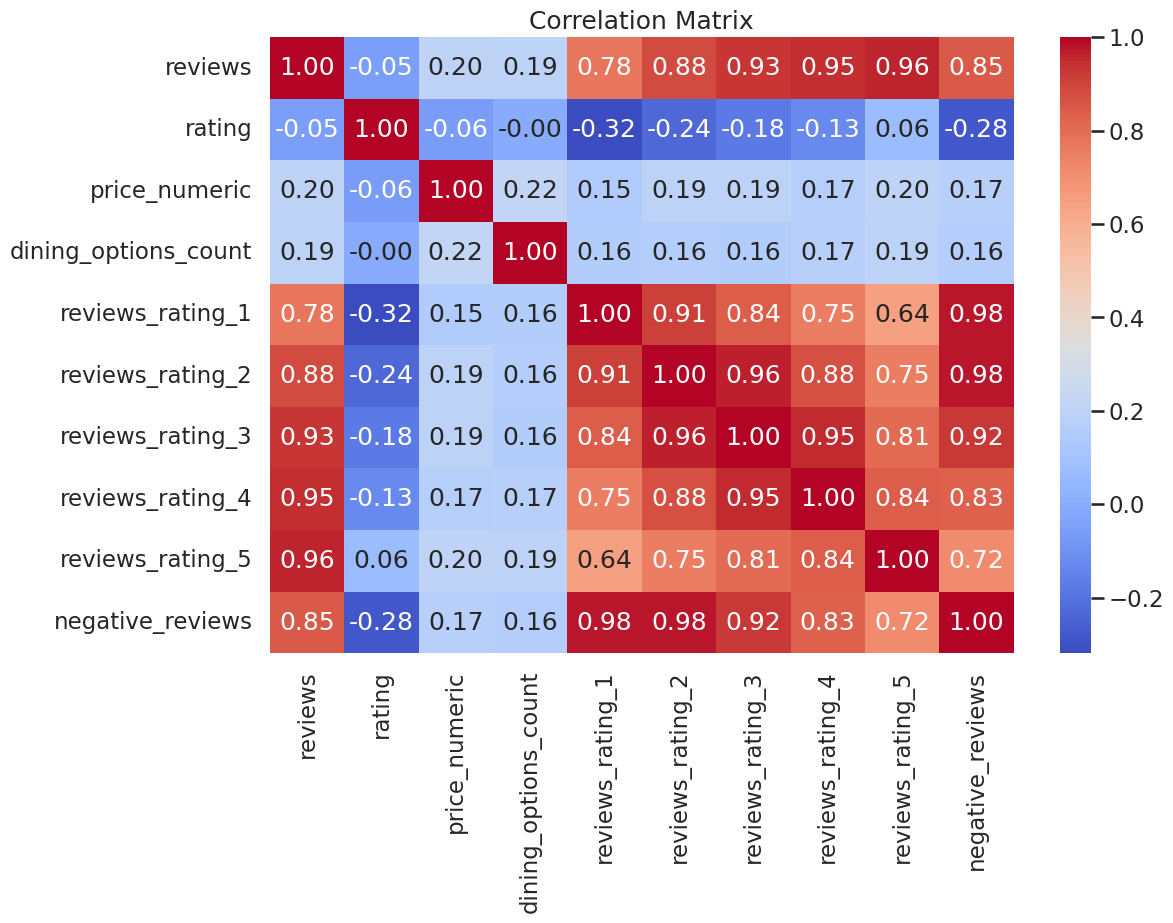

In [ ]:
# 1. Корреляционный анализ (числовые признаки)
# ---------------------------
plt.figure(figsize=(12,8))
numeric_cols = ['reviews', 'rating', 'price_numeric', 'dining_options_count',
                'reviews_rating_1', 'reviews_rating_2', 'reviews_rating_3',
                'reviews_rating_4', 'reviews_rating_5', 'negative_reviews']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Влияет ли статус спонсированности на рейтинг?

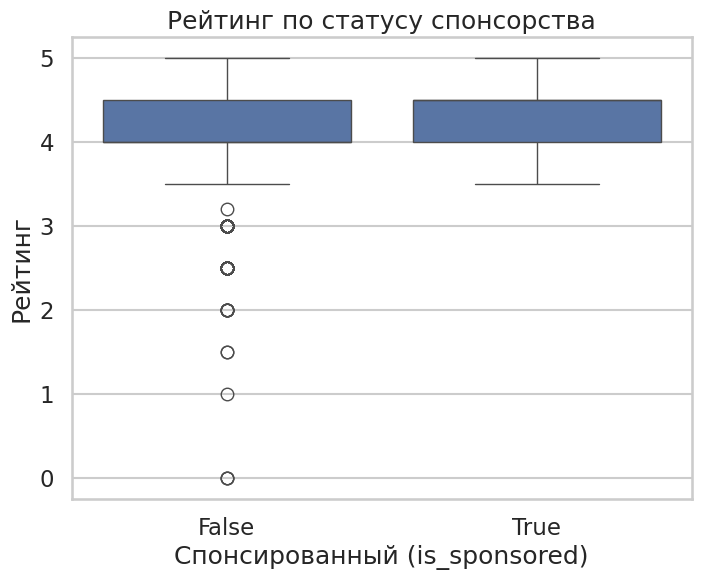

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='is_sponsored', y='rating', data=df)
plt.title("Рейтинг по статусу спонсорства")
plt.xlabel("Спонсированный (is_sponsored)")
plt.ylabel("Рейтинг")
plt.show()

In [ ]:
# 3. Действительно ли дорогие рестораны имеют более высокие оценки?

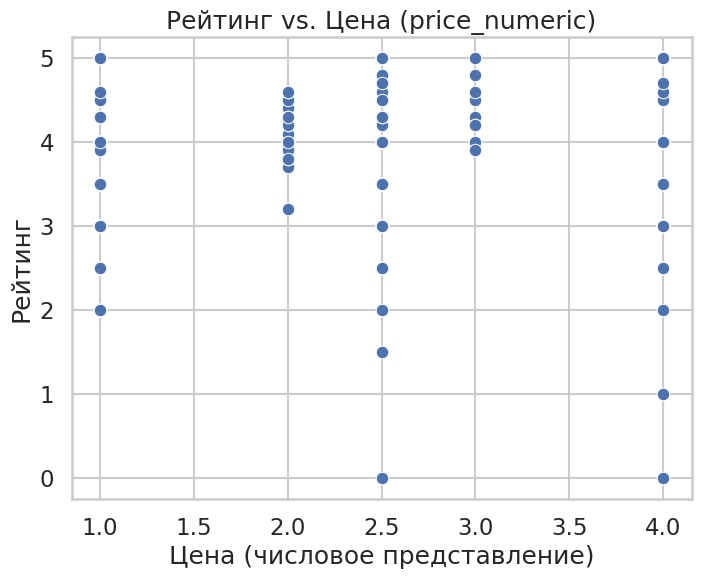

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='price_numeric', y='rating', data=df)
plt.title("Рейтинг vs. Цена (price_numeric)")
plt.xlabel("Цена (числовое представление)")
plt.ylabel("Рейтинг")
plt.show()

In [ ]:
#4. Какие кухни получают самые высокие оценки?

<ipython-input-54-51f349987f72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='main_cuisine_category', y='rating', palette='Set2')


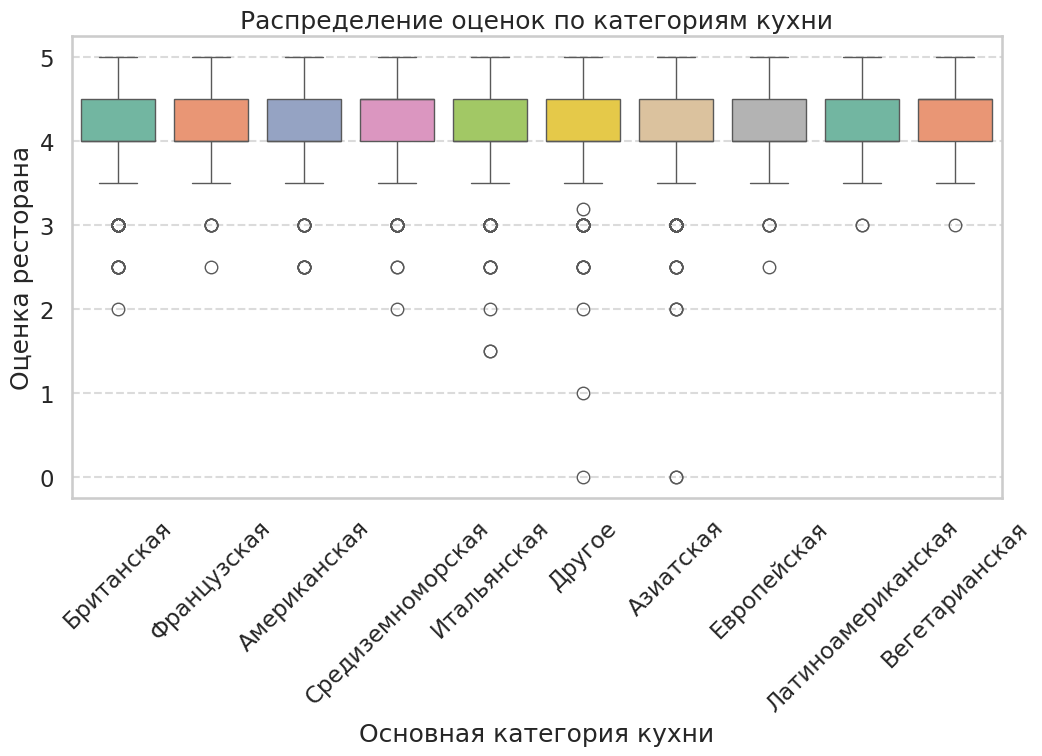

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='main_cuisine_category', y='rating', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel("Основная категория кухни")
plt.ylabel("Оценка ресторана")
plt.title("Распределение оценок по категориям кухни")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-56-068c05a2d54a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='main_cuisine_category', y='rating', palette='muted')


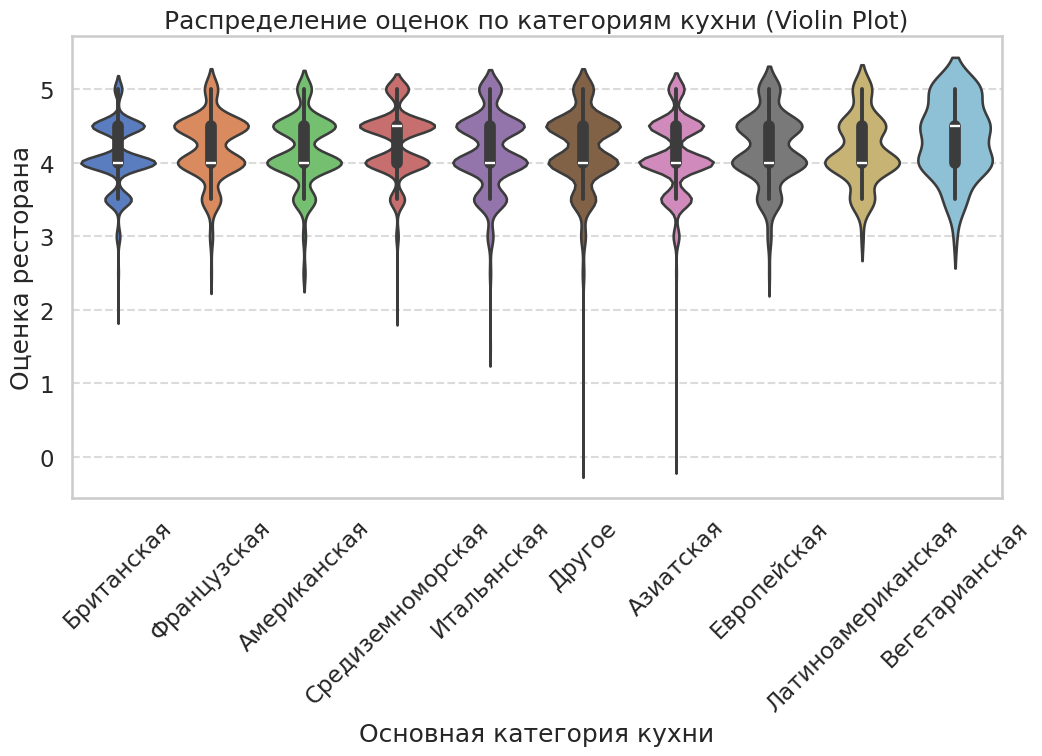

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='main_cuisine_category', y='rating', palette='muted')
plt.xticks(rotation=45)
plt.xlabel("Основная категория кухни")
plt.ylabel("Оценка ресторана")
plt.title("Распределение оценок по категориям кухни (Violin Plot)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# 5. Связан ли тип кухни с количеством отзывов?


<ipython-input-66-5ee6b0a03067>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='main_cuisine_category', y='reviews', palette='Set2')


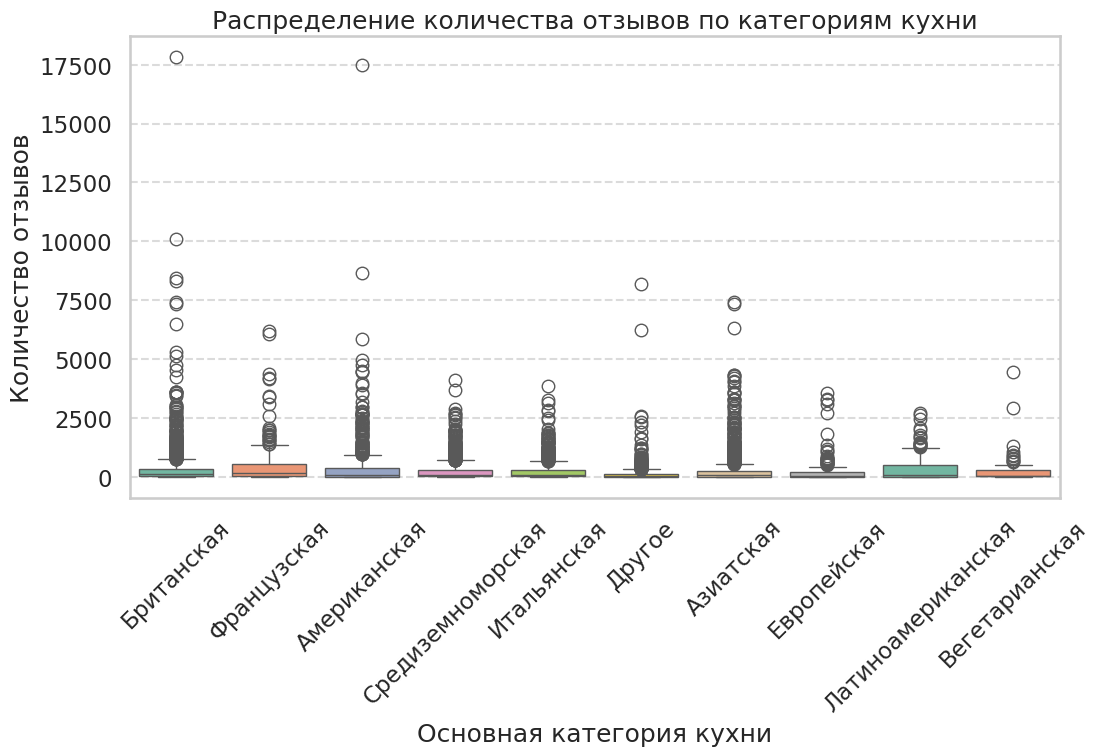

In [ ]:

# Boxplot для количества отзывов по категориям кухни
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='main_cuisine_category', y='reviews', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel("Основная категория кухни")
plt.ylabel("Количество отзывов")
plt.title("Распределение количества отзывов по категориям кухни")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-68-f8b5898ed70e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_reviews.index, y=mean_reviews.values, palette='coolwarm')


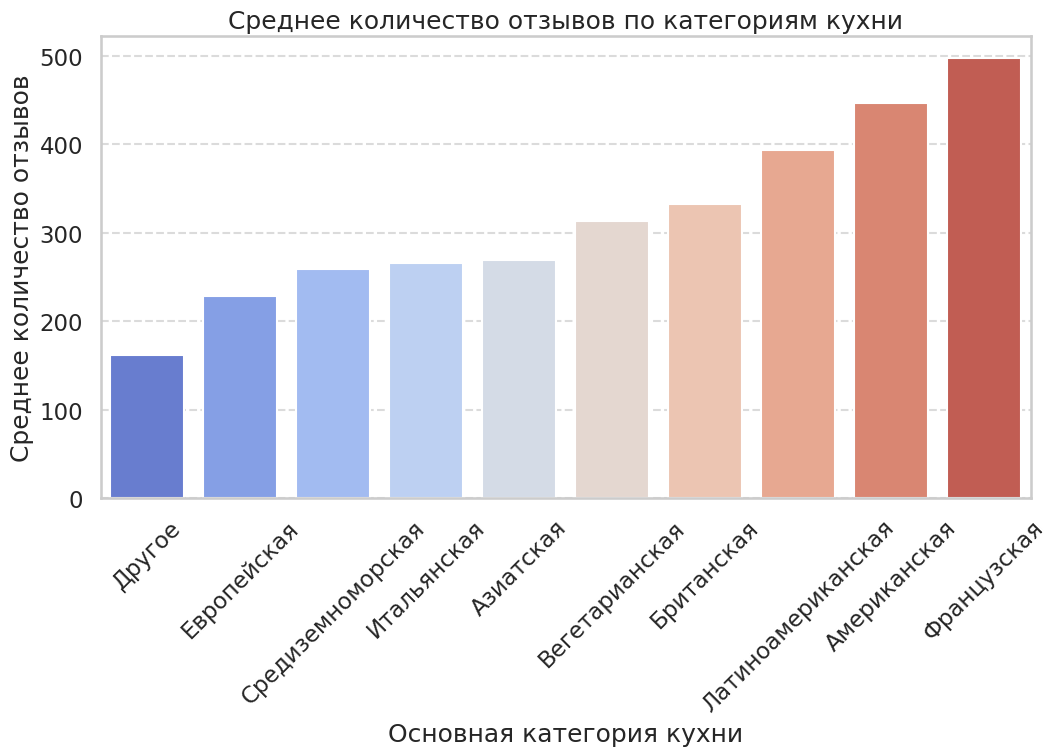

In [ ]:
mean_reviews = df.groupby('main_cuisine_category')['reviews'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_reviews.index, y=mean_reviews.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Основная категория кухни")
plt.ylabel("Среднее количество отзывов")
plt.title("Среднее количество отзывов по категориям кухни")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Какие кухни чаще всего выбирают спонсированные рестораны?


<ipython-input-69-8d8dee1e71f0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sponsored_cuisine_counts.index, y=sponsored_cuisine_counts.values, palette="coolwarm")


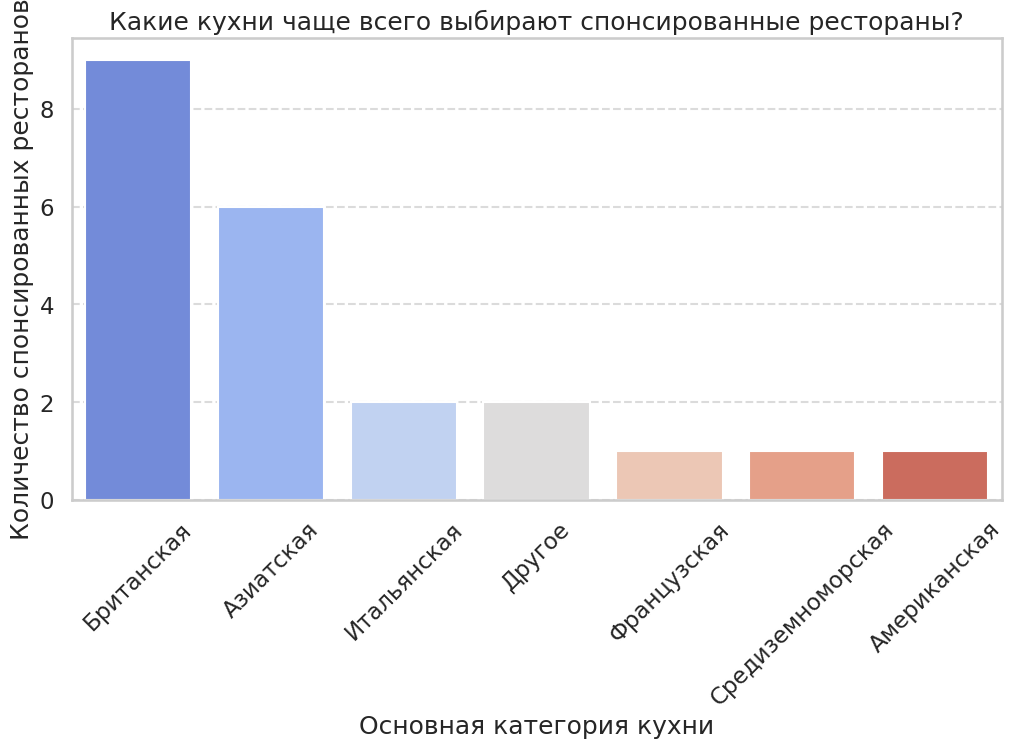

In [ ]:
df['main_cuisine_category'] = df['cuisines'].apply(categorize_cuisine)

# Анализ выбора кухонь спонсированными ресторанами
sponsored_restaurants = df[df['is_sponsored'] == True]

# Подсчитываем количество ресторанов каждой категории
sponsored_cuisine_counts = sponsored_restaurants['main_cuisine_category'].value_counts()

# Визуализируем результаты
plt.figure(figsize=(12, 6))
sns.barplot(x=sponsored_cuisine_counts.index, y=sponsored_cuisine_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Основная категория кухни")
plt.ylabel("Количество спонсированных ресторанов")
plt.title("Какие кухни чаще всего выбирают спонсированные рестораны?")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#Рестораны с доставкой получают выше рейтинг или нет?


<ipython-input-70-9bc24687778f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='has_delivery', y='rating', palette='coolwarm')


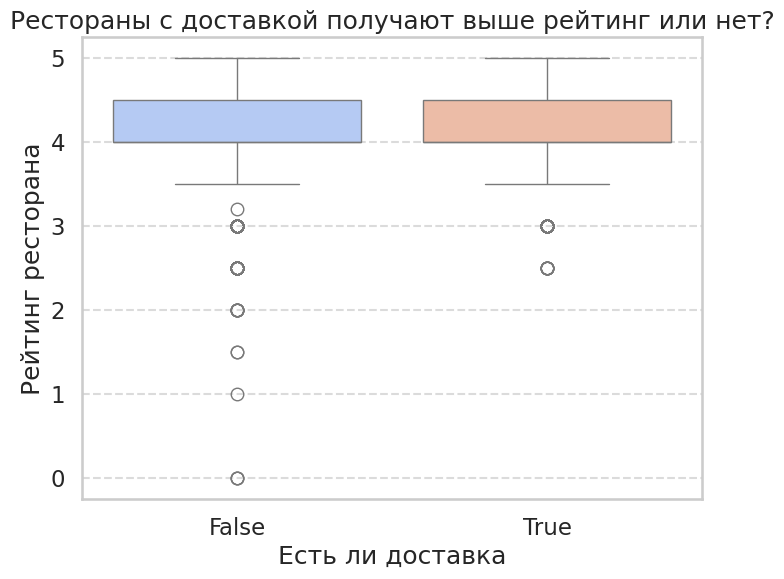

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='has_delivery', y='rating', palette='coolwarm')
plt.xlabel("Есть ли доставка")
plt.ylabel("Рейтинг ресторана")
plt.title("Рестораны с доставкой получают выше рейтинг или нет?")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
mean_ratings = df.groupby('has_delivery')['rating'].mean()
print("Средний рейтинг ресторанов с доставкой и без:")
print(mean_ratings)

Средний рейтинг ресторанов с доставкой и без:
has_delivery
False    4.149618
True     4.169420
Name: rating, dtype: float64


In [ ]:
#Рестораны с большим количеством "1-2 звезд" - это проблема качества?(Влияет ли цена на количество негативных отзывов?)



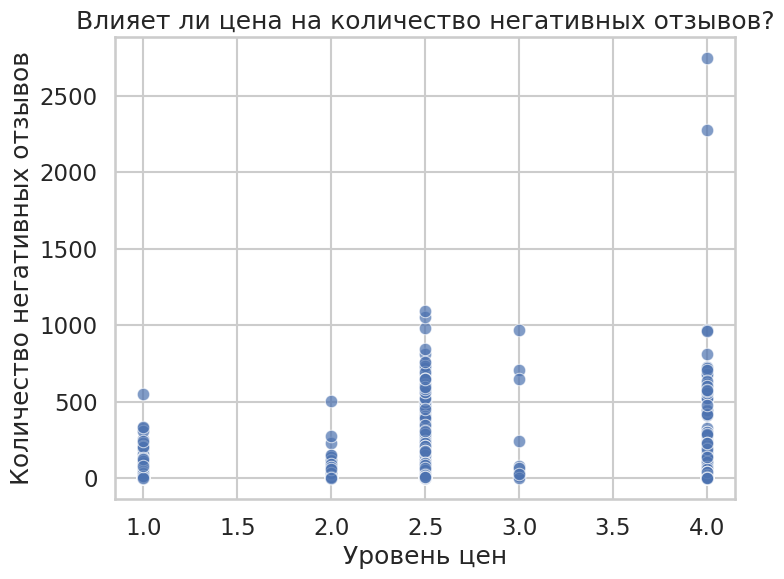

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price_numeric', y='negative_reviews', alpha=0.7)
plt.xlabel("Уровень цен")
plt.ylabel("Количество негативных отзывов")
plt.title("Влияет ли цена на количество негативных отзывов?")
plt.grid(True)
plt.show()

In [ ]:
#Есть ли “противоречивые “рестораны ? (много 1-звездочных и 5-звездочных оценок одновременно)

In [ ]:
df.head()

,Unnamed: 0,name,reviews,rating,price_range,is_sponsored,latitude,longitude,has_delivery,is_premium,...,dining_options,reviews_rating_1,reviews_rating_2,reviews_rating_3,reviews_rating_4,reviews_rating_5,IsIn_MICHELIN_Guide,price_numeric,dining_options_count,negative_reviews
0,0,Leicester Arms,602.0,4.5,$$ - $$$,True,51.510597,-0.137677,False,False,...,"Reservations, Seating, Street Parking, Televis...",30.0,23.0,51.0,156.0,342.0,0.0,2.5,16,53.0
1,1,Swiss Butter,182.0,4.0,$$ - $$$,True,51.520620,-0.122808,False,True,...,"Seating, Wheelchair Accessible, Serves Alcohol...",21.0,15.0,14.0,22.0,110.0,0.0,2.5,7,36.0
2,2,Florattica Rooftop Bar London,316.0,4.5,$$ - $$$,False,51.512955,-0.075292,False,True,...,"Reservations, Outdoor Seating, Seating, Serves...",15.0,4.0,7.0,11.0,279.0,0.0,2.5,12,19.0
3,3,The Black Dog Freehouse,733.0,4.5,$$ - $$$,False,51.488724,-0.120889,False,False,...,"Reservations, Outdoor Seating, Seating, Highch...",19.0,23.0,47.0,216.0,428.0,0.0,2.5,9,42.0
4,4,Fitz's Brasserie,48.0,5.0,$$ - $$$,False,51.522408,-0.124933,False,False,...,"Reservations, Seating, Wheelchair Accessible, ...",0.0,1.0,1.0,2.0,44.0,0.0,2.5,7,1.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic


data = pd.read_csv('/content/merged (1).csv')

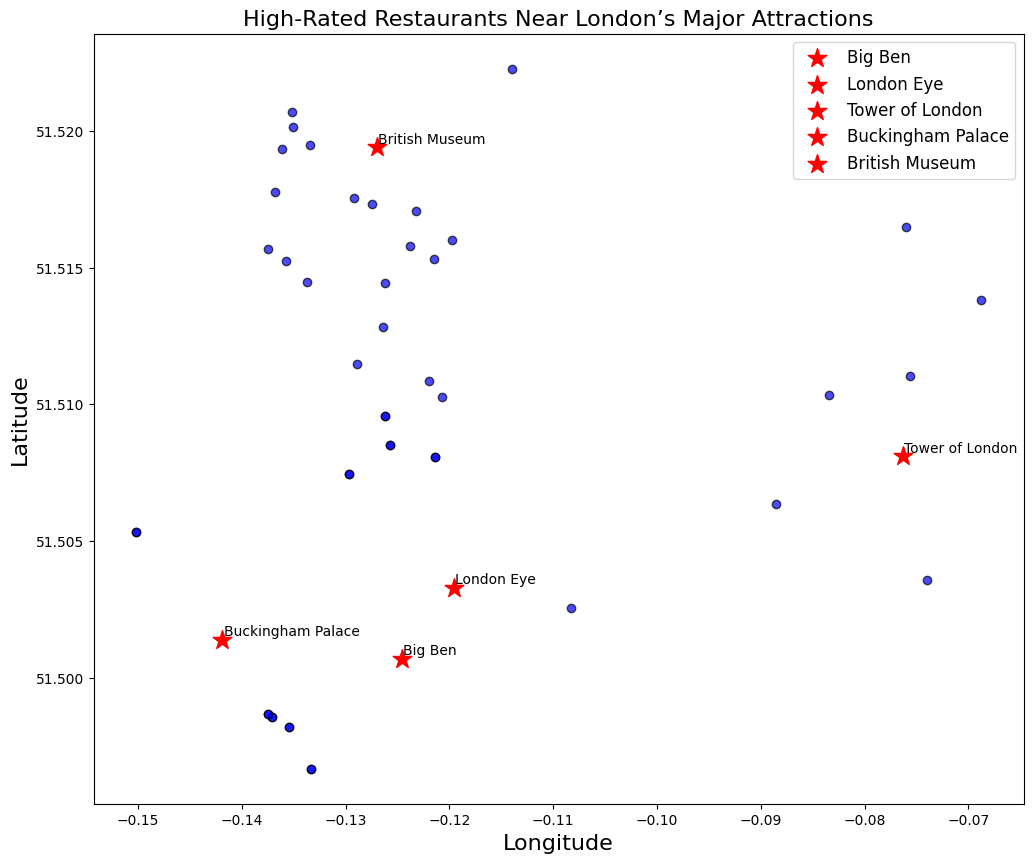

In [6]:
attractions = {
    'Big Ben': [51.5007, -0.1246],
    'London Eye': [51.5033, -0.1196],
    'Tower of London': [51.5081, -0.0763],
    'Buckingham Palace': [51.5014, -0.1419],
    'British Museum': [51.5194, -0.1270],
}


rating_threshold = 4.6
min_reviews_for_restaurant = 50
min_restaurants_in_area = 5

filtered_data = data[(data['reviews'] >= min_reviews_for_restaurant) &
                     (data['rating'] >= rating_threshold)]


plt.figure(figsize=(12, 10))


for name, coords in attractions.items():
    plt.scatter(coords[1], coords[0], marker='*', color='red', s=200, label=name)  # звездочки для достопримечательностей


    plt.text(coords[1] + 0.00015, coords[0] + 0.00015, name, fontsize=10, ha='left')


def get_nearby_restaurants(attraction_coords, radius_km=1):
    nearby_restaurants = []
    for _, row in filtered_data.iterrows():
        restaurant_coords = (row['latitude'], row['longitude'])
        distance = geodesic(attraction_coords, restaurant_coords).km
        if distance <= radius_km:
            nearby_restaurants.append(row)
    return nearby_restaurants


for name, coords in attractions.items():
    nearby_restaurants = get_nearby_restaurants(coords, radius_km=1)


    for restaurant in nearby_restaurants:
        plt.scatter(restaurant['longitude'], restaurant['latitude'],
                    c='blue', alpha=0.7, edgecolors='black')


plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.title('High-Rated Restaurants Near London’s Major Attractions', fontsize=16)
plt.legend(fontsize=12)


plt.show()
